In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pydotplus
from networkx.drawing.nx_pydot import graphviz_layout
import random
import nxviz as nv
import matplotlib
import math
import pandas as pd
import scipy.stats as stats

warnings.filterwarnings('ignore')

#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Build Timetables

In [5]:
# https://www.bls.gov/opub/btn/volume-4/people-who-are-not-in-the-labor-force-why-arent-they-working.htm
# About 15%
retired = 0.15
#firstshift = 
#secondshift = 
#thirdshift = 

#timetable = [[False] * 24 for day in range(7)]


Generate some data for location, persons, persons at location, and persons co-present at location

## Activity Coding from ATUS

In [150]:
class Location():
    
    def __init__(self, name, meanduration):
        self.name = name
        self.lifecycles = self.set_lifecycles()
        self.socialclasses = self.set_socialclasses()
        self.psychographics = self.set_psychographics()
        self.maxfreq = random.randint(1, 10)
        self.minfreq = random.randint(0, int(self.maxfreq/3))
        self.capacity = self.set_capactiy()
        self.expense = self.set_expense()
        self.meanduration = meanduration
        self.current_clients = 0
        
    def reset_clients(self):
        self.current_clients = 0
        
    def set_lifecycles(self):
        start = random.randint(0, len(lifecycles) - 1)
        howmany = random.randint(1, len(lifecycles))
        # Append the list to itself to make circular
        # List comprehension to pull out only values
        # Pull out the slice
        lc = [i[1] for i in lifecycles + lifecycles][start : start + howmany]
        return lc
    
    def set_socialclasses(self):
        start = random.randint(0, len(socialclasses) - 1)
        howmany = random.randint(1, len(socialclasses))
        start = start - int(round(howmany/2))
        if start < 0:
            start = 0
        sc = [i[1] for i in socialclasses][start : start + howmany]
        return sc
    
    def set_psychographics(self):
        k = random.randint(4, len(psychographics))
        pg = random.sample(psychographics, k)
        return pg
    
    def set_capactiy(self):
        a, b = 1.5, 8
        loc, scale = 10, 1000
        return int(stats.beta.rvs(a, b, loc=loc, scale=scale, size=1))
    
    def set_expense(self):
        my_mean, my_std = 3.5, 1
        a, b = (1 - my_mean) / my_std, (6 - my_mean) / my_std
        return stats.truncnorm.rvs(a, b, loc=my_mean, scale=my_std, size=1)
        
        
class Person():
    
    def __init__(self, name, mean_public, connection=None):
        self.name = name
        self.lifecycle = self.set_lifecycle()
        self.socialclass = self.set_socialclass()
        self.psychographics = self.set_psychographics()
        self.mean_public = mean_public
        self.connection = connection
        self.current_location = None
        self.current_duration = 0
        self.visits_history = {}
        
    def add_visit(self, location):
        self.current_location = location.name
        self.current_duration = 1
        try:
            self.visits_history[location.name]
        except KeyError:
            self.visits_history[location.name] = 1
        else:
            self.visits_history[location.name] += 1

    def end_visit(self, location):
        self.current_location = None
        self.current_duration = 0
        location.current_clients -= 1
        
    def set_lifecycle(self):
        r = np.random.random()
        if r < lifecycles[0][0]:
            lc = lifecycles[0][1]
        elif r < lifecycles[1][0]:
            lc = lifecycles[1][1]
        elif r < lifecycles[2][0]:
            lc = lifecycles[2][1]
        elif r < lifecycles[3][0]:
            lc = lifecycles[3][1]
        elif r < lifecycles[4][0]:
            lc = lifecycles[4][1]
        elif r < lifecycles[5][0]:
            lc = lifecycles[5][1]
        else:
            raise('Error in Life Cycle')
        return lc
        
    def set_socialclass(self):
        r = np.random.random()
        if r < socialclasses[0][0]:
            sc = socialclasses[0][1]
        elif r < socialclasses[1][0]:
            sc = socialclasses[1][1]
        elif r < socialclasses[2][0]:
            sc = socialclasses[2][1]
        elif r < socialclasses[3][0]:
            sc = socialclasses[3][1]
        elif r < socialclasses[4][0]:
            sc = socialclasses[4][1]
        elif r < socialclasses[5][0]:
            sc = socialclasses[5][1]
        else:
            raise('Error in Social Class')
        return sc
    
    def set_psychographics(self):
        pg = []
        s = np.random.randint(2, size=int(len(psychographics)/2))
        for idx, val in enumerate(s):
            if val > 0:
                pg.append(psychographics[idx*2 + np.random.randint(2)])
        return pg

        
        
# A small town with a population of 1000 might have about 400 private locations
# and about 50 public locations

movements = 2 * (5 * 6 + 2 * 12)  
# move every half hour for 6 hours during weekdays and 12 hours on weekends


In [35]:
100-16-16-16-24

28

In [186]:
def generate_locations(public, private):
    public_locations = []
    for i in range(0, public):
        
        name = 'L' + str(i)
        meanduration = int(100 * np.random.beta(2, 80, size=None) + 1)

        public_locations.append(
            Location(name, sc, pg, maxfreq, minfreq, capacity, expense, meanduration)
            
        )

    private_locations = []
    for i in range(0, private):
        private_locations.append(
            Location('R' + str(i), ['any'], ['any'], ['all'], 10000, 0, 100000, 1, 20)
        )
        
    return public_locations, private_locations
            
# name, connection        
def generate_persons(number):
    persons = []
    for i in range(0, number):
        persons.append(
            Person('P' + str(i), np.random.random())
        )
        #print(persons[-1:])
    return persons


In [40]:
public_locations, private_locations = generate_locations(10, 1)

In [172]:
persons = generate_persons(1)

In [42]:
# lifecycles, socialclasses, psychographics, maxfreq, minfreq, capacity, expense, meanduration
# lifecycle, socialclass, psychographics, mean_public, connection

def _join_public(idx, person):
    count = 0
    while count < len(public_locations):
        count += 1
        if public_locations[count-1].current_clients >= public_locations[count-1].capacity:
            continue
        if person.lifecycle not in public_locations[count-1].lifecycles:
            continue
        if person.socialclass not in public_locations[count-1].socialclasses:
            continue
        if set(person.psychographics).isdisjoint(set(public_locations[count-1].psychographics)):
            continue
            
        public_locations[count-1].current_clients += 1
        person.add_visit(count-1)
        return ('L' + str(count-1), 'P' + str(idx))
    
    print("Unable to match Person with Location")
    return False

def join_public(idx, person):
    for location in public_locations:
        if location.current_clients >= location.capacity:
            continue
        if person.lifecycle not in location.lifecycles:
            continue
        if person.socialclass not in location.socialclasses:
            continue
        if set(person.psychographics).isdisjoint(set(location.psychographics)):
            continue
            
        location.current_clients += 1
        person.add_visit(location)
        return (location.name, person.name)
    
    print("Unable to match Person with Location")
    return False

    
def join_private(idx, person):
    return None


def get_current_location(location_name, location_type):
    if location_type == 'public_locations':
        return next(x for x in public_locations if x.name == location_name)
    return False


def get_movers():
    movers = []
    for idx, person in enumerate(persons):
        #print(person.current_location)
        if person.current_location == None:
            movers.append(idx)
            continue
        current_location = get_current_location(person.current_location, 'public_locations')
        if person.current_duration >= current_location.meanduration:
            movers.append(idx)
            person.end_visit(current_location)
    return movers


def make_edges_from_list(node_list):
    edges = []
    limit = len(node_list)
    for idx, val in enumerate(node_list):
        count = idx + 1
        while count < limit:
            edges.append((val, node_list[count]))
            count += 1
    return edges




    

edges = []
person_edges = []
for i in range(0, 100):
    movers = get_movers()
    np.random.shuffle(movers)
    # [x.reset_clients() for x in public_locations]
    session_edges = []
    for idx in movers:
        person = persons[idx]
        #print(person.mean_public)
        if np.random.random() < person.mean_public:
            joint = join_public(idx, person)
            if joint != False:
                edges.append(joint)
                session_edges.append(joint)
        else:
            join_private(idx, person)
            
    #edges = edges + session_edges
    
    persons_present = [d for n, d in session_edges]
    person_person = make_edges_from_list(persons_present)
    person_edges = person_edges + person_person

In [93]:
len(edges)

733

In [60]:
#nx.degree_centrality(G)

## Hive Plots
https://github.com/ericmjl/hiveplot

In [341]:
## assume that you have a graph called G
nodes = dict()
#nodes['group1'] = [(n,d) for n, d in G.nodes(data=True) if d == some_criteria()]
#nodes['chainA'] = [n for n, d in p.nodes(data=True) if d['chain_id'] == 'A']
nodes['group1'] = [n for n, d in G.nodes(data=True) if d['color'] == 'red']
nodes['group2'] = [n for n, d in G.nodes(data=True) if d['color'] == 'blue']

In [342]:
edges = dict()
edges['all'] = [(u,v,d) for u,v,d in G.edges(data=True)]

In [343]:
nodes_cmap = dict()
nodes_cmap['group1'] = 'red'
nodes_cmap['group2'] = 'blue'

edges_cmap = dict()
edges_cmap['all'] = 'green'

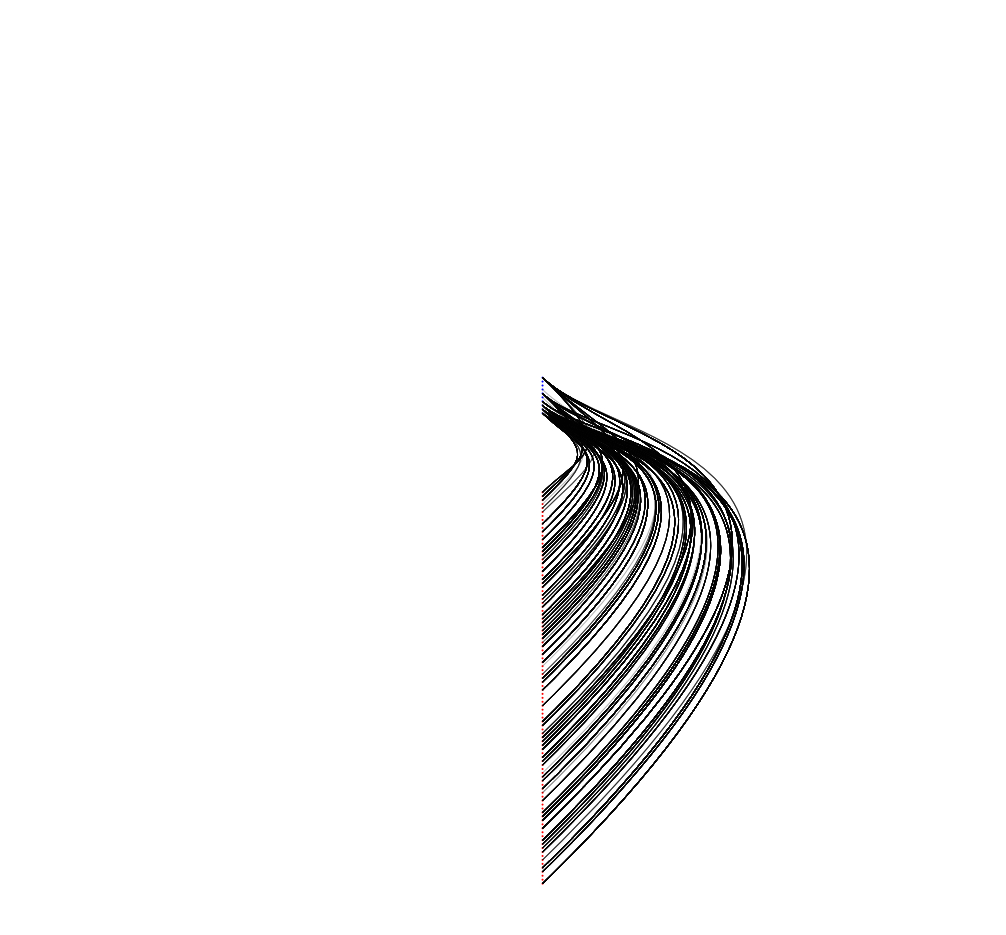

In [344]:
from hiveplot import HivePlot

#h = HivePlot(nodes, edges, nodes_cmap, edges_cmap)
h = HivePlot(nodes, edges, nodes_cmap)
h.draw()
plt.show()

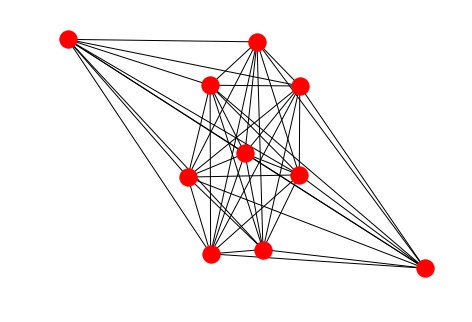

In [39]:
G=nx.complete_graph(10)
pos=nx.spring_layout(G)
nx.draw_spring(G)
#plt.savefig("edge_colormap.png") # save as png
plt.show() # display

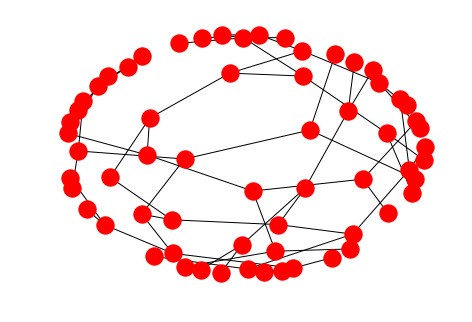

In [49]:
G=nx.balanced_tree(2, 5)
nx.draw(G)
plt.show() # display

In [176]:
set(persons[2].psychographics).isdisjoint(set(public_locations[3].psychographics))

True

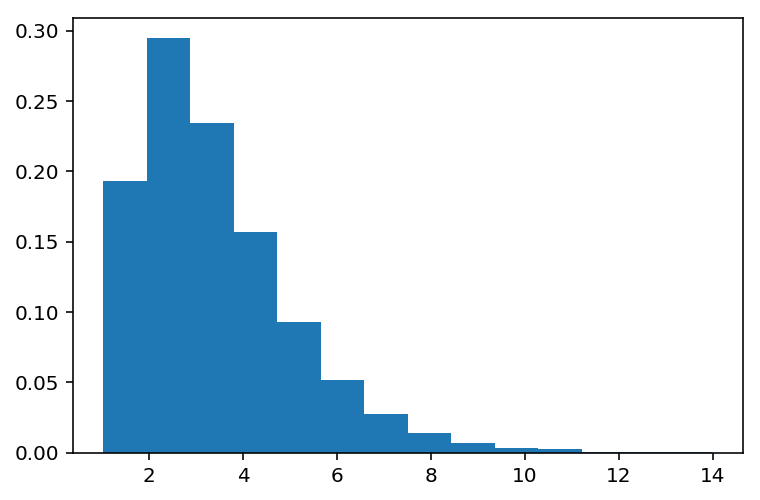

In [25]:
#s = np.random.poisson(5, 10000)
s = 100 * np.random.beta(2, 80, size=10000) + 1
s.astype(int)
count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()

In [32]:
int(1000 * np.random.beta(2, 40, size=None))

20

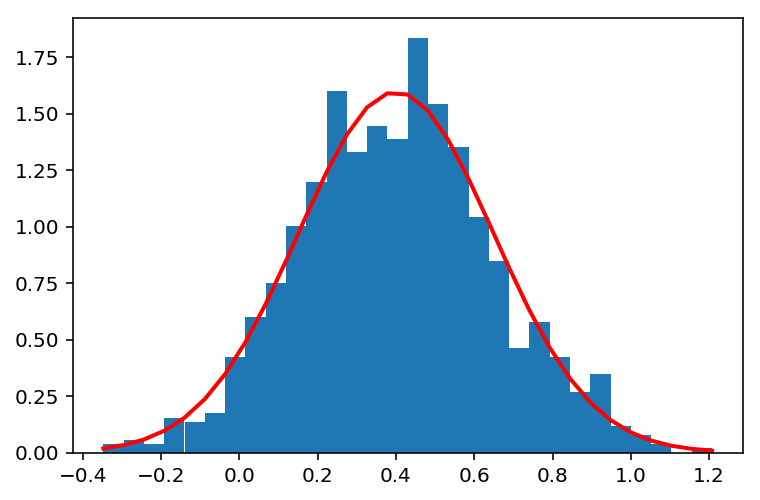

In [77]:
mu, sigma = 0.4, 0.25
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [72]:
int(100 * np.random.normal(mu, sigma, size=None))

72

In [73]:
int(4 * np.random.normal(mu, sigma, size=None)) + 1

2

In [62]:
int(4 * s.min()) + 1

1

In [135]:
mu = 0.40
goingout = []
for i in range(0, 100000):
    # indexing the tuple (0,1) with T,F
    goingout.append((0, 1)[(np.random.random() < mu)])


In [136]:
np.mean(goingout)

0.39887

In [147]:
(0, 1)[(np.random.random() < 0.5)]

1

In [127]:
(np.random.random() < 0.5)

True

In [152]:
#max(stats.values())
centrality = nx.degree_centrality(MG)
max(centrality.values())
max(centrality, key=centrality.get)
print(max(centrality.values()), max(centrality, key=centrality.get))
max(centrality, key=centrality.get)

NameError: name 'MG' is not defined

In [141]:
from collections import Counter

Counter(person_edges).most_common(10)

[(('P23', 'P37'), 40),
 (('P23', 'P62'), 40),
 (('P23', 'P86'), 37),
 (('P86', 'P62'), 36),
 (('P62', 'P23'), 36),
 (('P70', 'P23'), 35),
 (('P23', 'P21'), 35),
 (('P21', 'P23'), 34),
 (('P86', 'P23'), 34),
 (('P43', 'P23'), 33)]

In [148]:
Counter([n[0] for n in person_edges] + [n[1] for n in person_edges]).most_common(10)

[('P23', 589),
 ('P62', 556),
 ('P86', 540),
 ('P21', 474),
 ('P43', 450),
 ('P37', 440),
 ('P70', 413),
 ('P93', 303),
 ('P50', 166),
 ('P36', 140)]

In [ ]:
[n for n, d in G.nodes(data=True) if d['color'] == 'red']

In [79]:
matplotlib.rcParams['figure.figsize'] = (14,8)

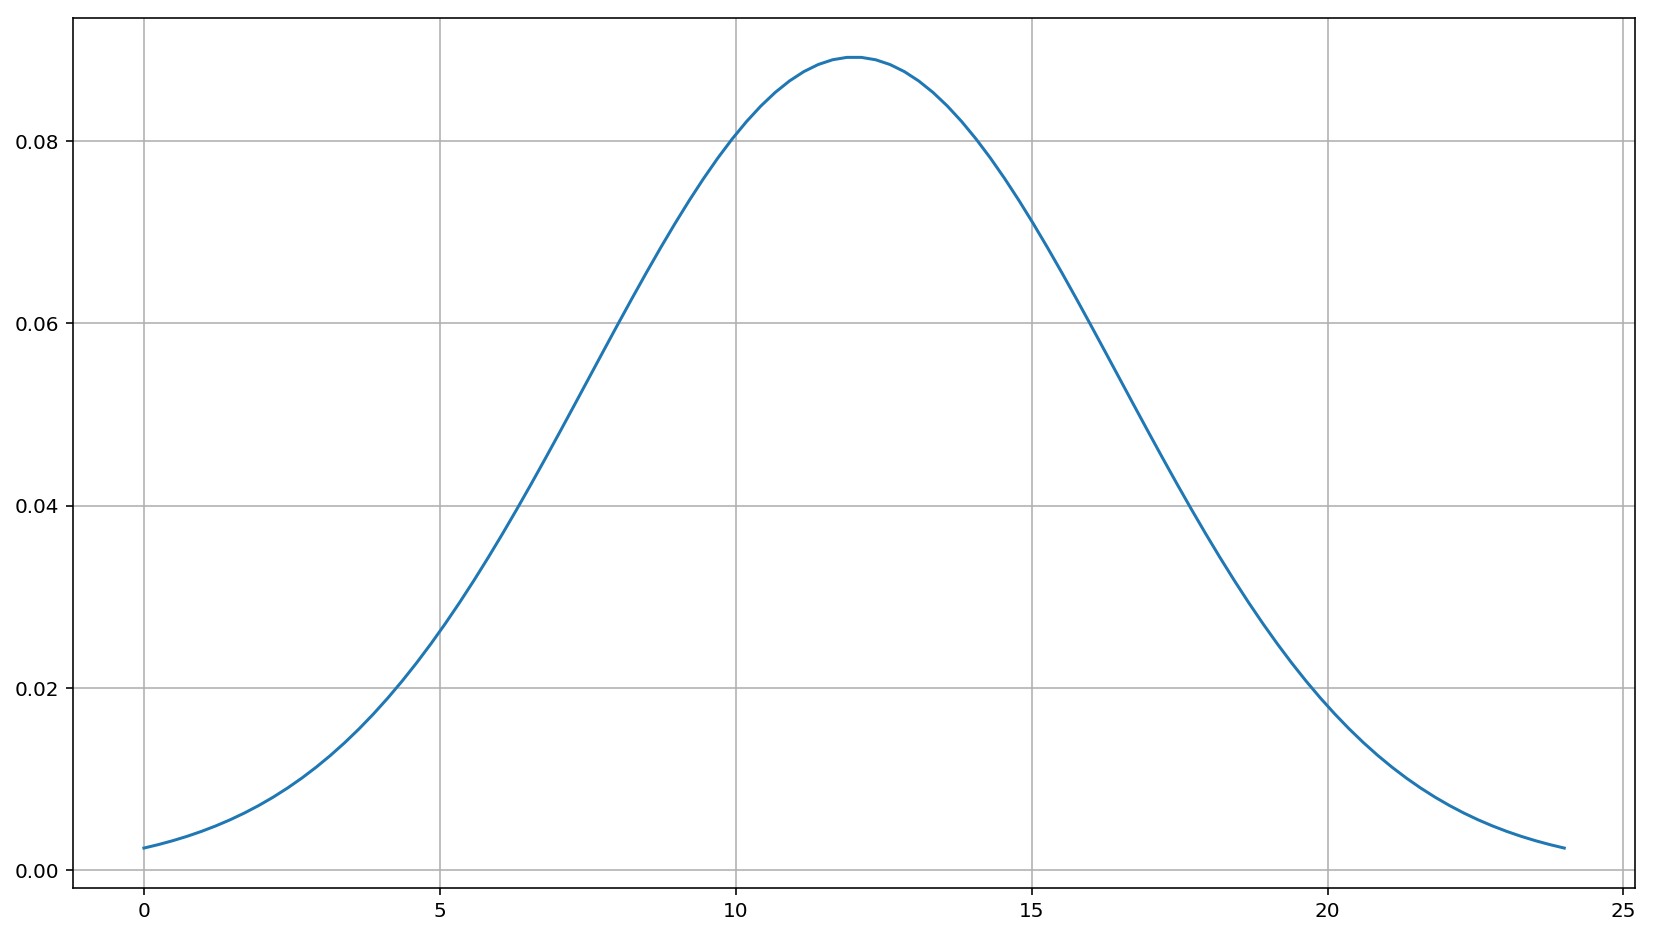

In [26]:
mu = 12
variance = 20
sigma = math.sqrt(variance)
x = np.linspace(0, 24, 100)
plt.plot(x,matplotlib.mlab.normpdf(x, mu, sigma))
plt.grid(True, which='both')

plt.show()

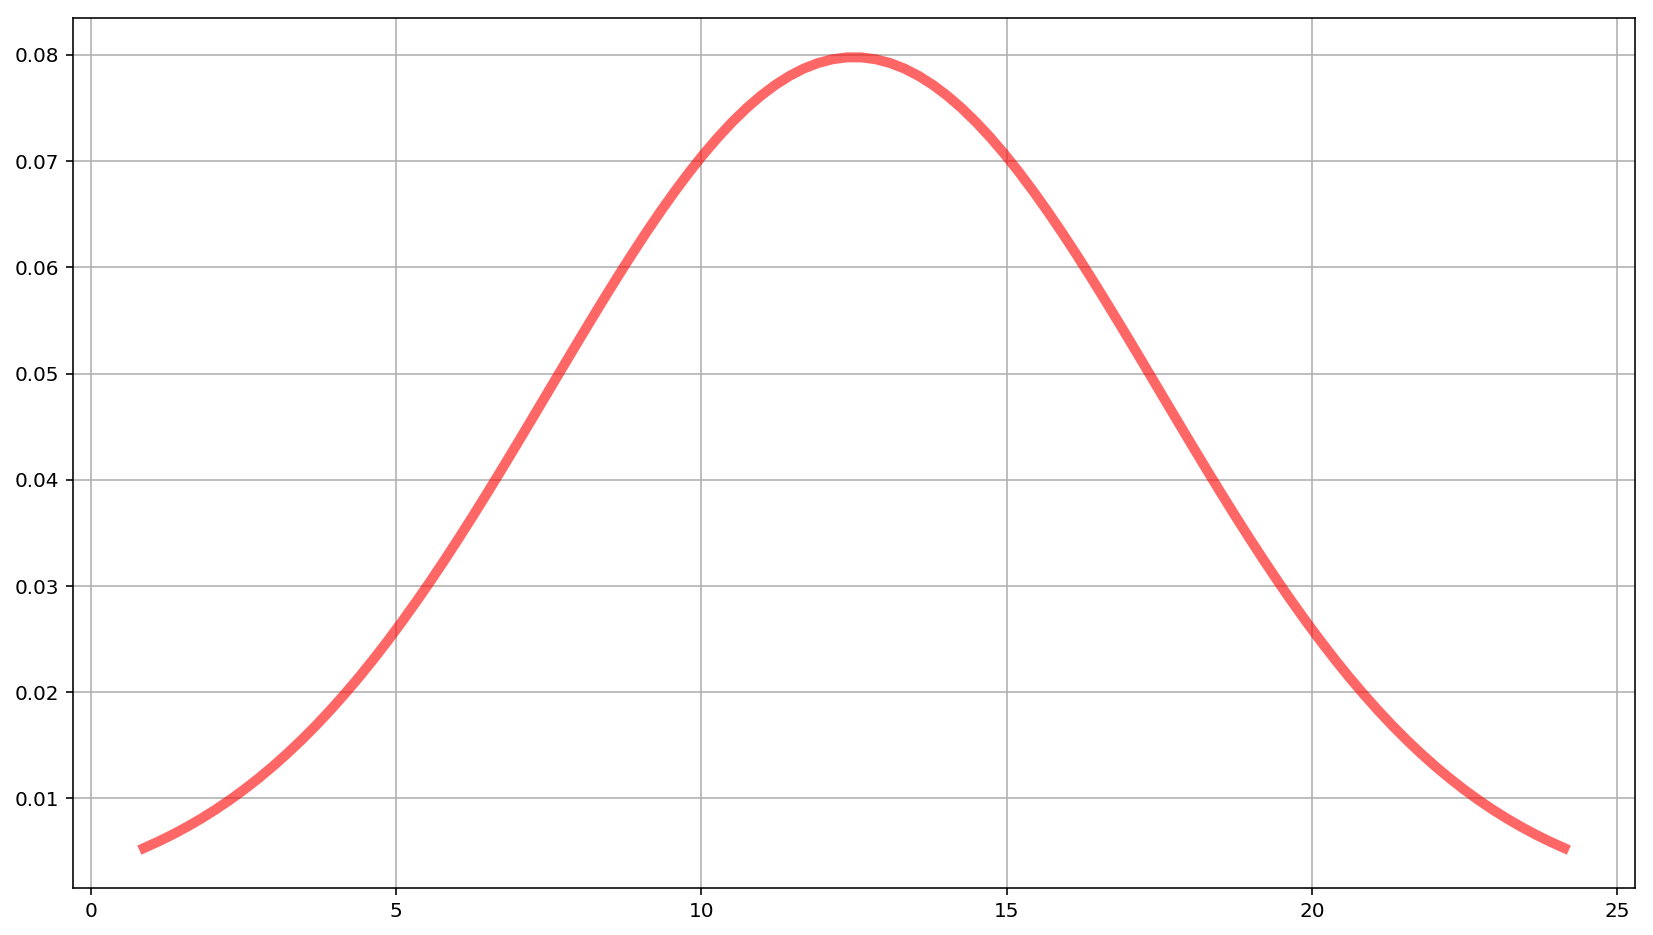

In [80]:
#from scipy.stats import norm
loc = 12.5
scale = 5
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
x = np.linspace(stats.norm.ppf(0.01, loc=loc, scale=scale), stats.norm.ppf(0.99, loc=loc, scale=scale), 100)
ax.plot(x, stats.norm.pdf(x, loc=loc, scale=scale), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.grid(True, which='both')
plt.show()

In [4]:
stats.norm.ppf([0.001, 0.5, 0.999])

array([-3.09023231,  0.        ,  3.09023231])

In [6]:
x = np.linspace(1, 48, 48)
print(x)
d = stats.norm.pdf(x, loc=loc, scale=scale)
l = d/stats.norm.pdf(12.5, loc=loc, scale=scale) * 0.6
r = np.random.random(size=48)
(r * d/stats.norm.pdf(12.5, loc=loc, scale=scale)) > 0.5

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.]


array([False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [8]:
day_of_week = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
weeks = 1
day_likelihood = stats.argus.rvs(1)
slots_per_day = 5
mean = 24.5
t_table = []
for day in range(0, 7 * weeks):
    #print(day)
    slots_today = stats.poisson.rvs(slots_per_day)
    #print(slots_today)
    r = np.random.random()
    #print(r)
    print(r, day_likelihood, day_of_week[day], slots_today, r)
    if r < day_likelihood:
        t_table.append({day_of_week[day%7]: np.sort(stats.poisson.rvs(mean, size=slots_today)/2)})
#for idx, day in enumerate(t_table):
    #print(day_of_week[idx%7])
t_table

0.6876677397225415 0.914885219107 Sunday 10 0.6876677397225415
0.41277203004175855 0.914885219107 Monday 4 0.41277203004175855
0.9389227136853858 0.914885219107 Tuesday 3 0.9389227136853858
0.3506043040365282 0.914885219107 Wednesday 1 0.3506043040365282
0.004186167782883499 0.914885219107 Thursday 8 0.004186167782883499
0.6651745282138187 0.914885219107 Friday 10 0.6651745282138187
0.9321410060946005 0.914885219107 Saturday 6 0.9321410060946005


[{'Sunday': array([  6.5,  10. ,  10. ,  10. ,  10.5,  10.5,  11. ,  12.5,  13. ,  15. ])},
 {'Monday': array([ 11. ,  11.5,  12. ,  15.5])},
 {'Wednesday': array([ 15.])},
 {'Thursday': array([ 11.5,  12. ,  12. ,  12.5,  13.5,  13.5,  15.5,  18. ])},
 {'Friday': array([  9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  13. ,  14. ,  15. ,  17. ])}]

[ 0.6361561   0.43915433  0.94813848  0.6583359   0.7088471   0.80488176
  0.80437089  0.71102264  0.62924194  0.96617598]


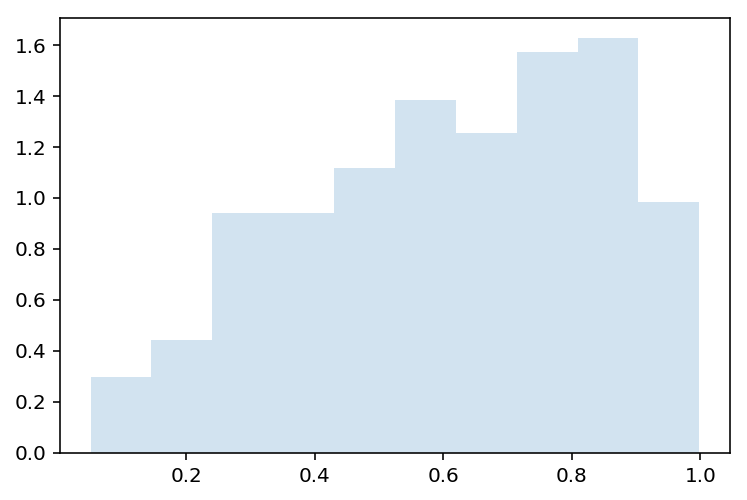

In [147]:
chi = 1
print(stats.argus.rvs(chi, size=10))
r = stats.argus.rvs(chi, size=1000)
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.show()

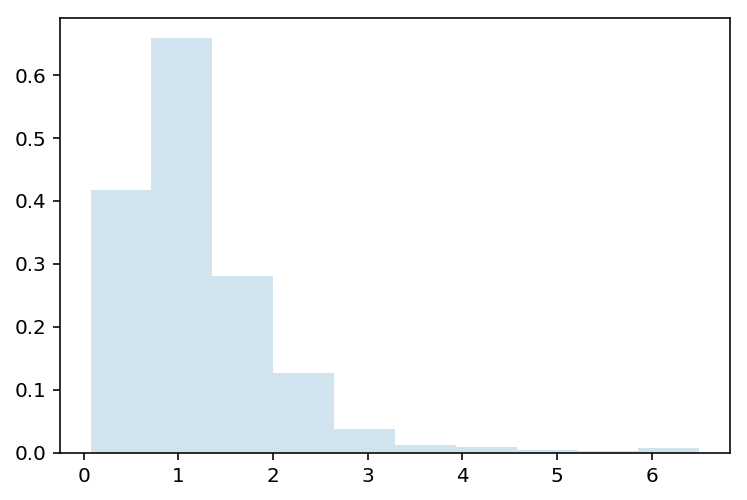

In [9]:
# Model Household Income
# https://en.wikipedia.org/wiki/Burr_distribution
# https://en.wikipedia.org/wiki/Household_income_in_the_United_States
c, d = 3, 1
r = stats.burr12.rvs(c, d, size=1000)
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.show()

In [38]:
# name, mean_public
        
persons = Person('P', np.random.random())
print(persons.socialclass, persons.lifecycle, persons.psychographics)
persons.set_socialclass(), persons.set_lifecycle(), persons.set_psychographics()

Working Post Family ['active', 'healthful', 'extractionist', 'extrovert', 'technophobe', 'enrichment']


('Underclass', 'Pre-family', ['extrovert', 'technophile', 'humble'])

In [151]:
expense = 5
meanduration = 2
location = Location('L', expense, meanduration)
print(location.lifecycles, location.socialclasses, location.psychographics)
location.set_lifecycles(), location.set_socialclasses(), location.set_psychographics()

['Post Family', 'Senior', 'Dependent', 'Pre-family', 'Early Family', 'Late Family'] ['Underclass'] ['status', 'impulse', 'entertainment', 'planner', 'active', 'extrovert', 'democrat', 'technophile', 'humble']


(['Dependent', 'Pre-family', 'Early Family', 'Late Family', 'Post Family'],
 ['Upper Middle', 'Lower Middle', 'Working', 'Working Poor', 'Underclass'],
 ['entertainment', 'relaxed', 'status', 'enrichment'])

In [143]:
a = 1.5
b = 8
loc = 10
scale = 1000
print(list(map(int, stats.beta.rvs(a, b, loc=loc, scale=scale, size=20))))


[273, 244, 82, 82, 30, 38, 22, 84, 60, 33, 43, 79, 244, 176, 214, 65, 38, 124, 42, 231]


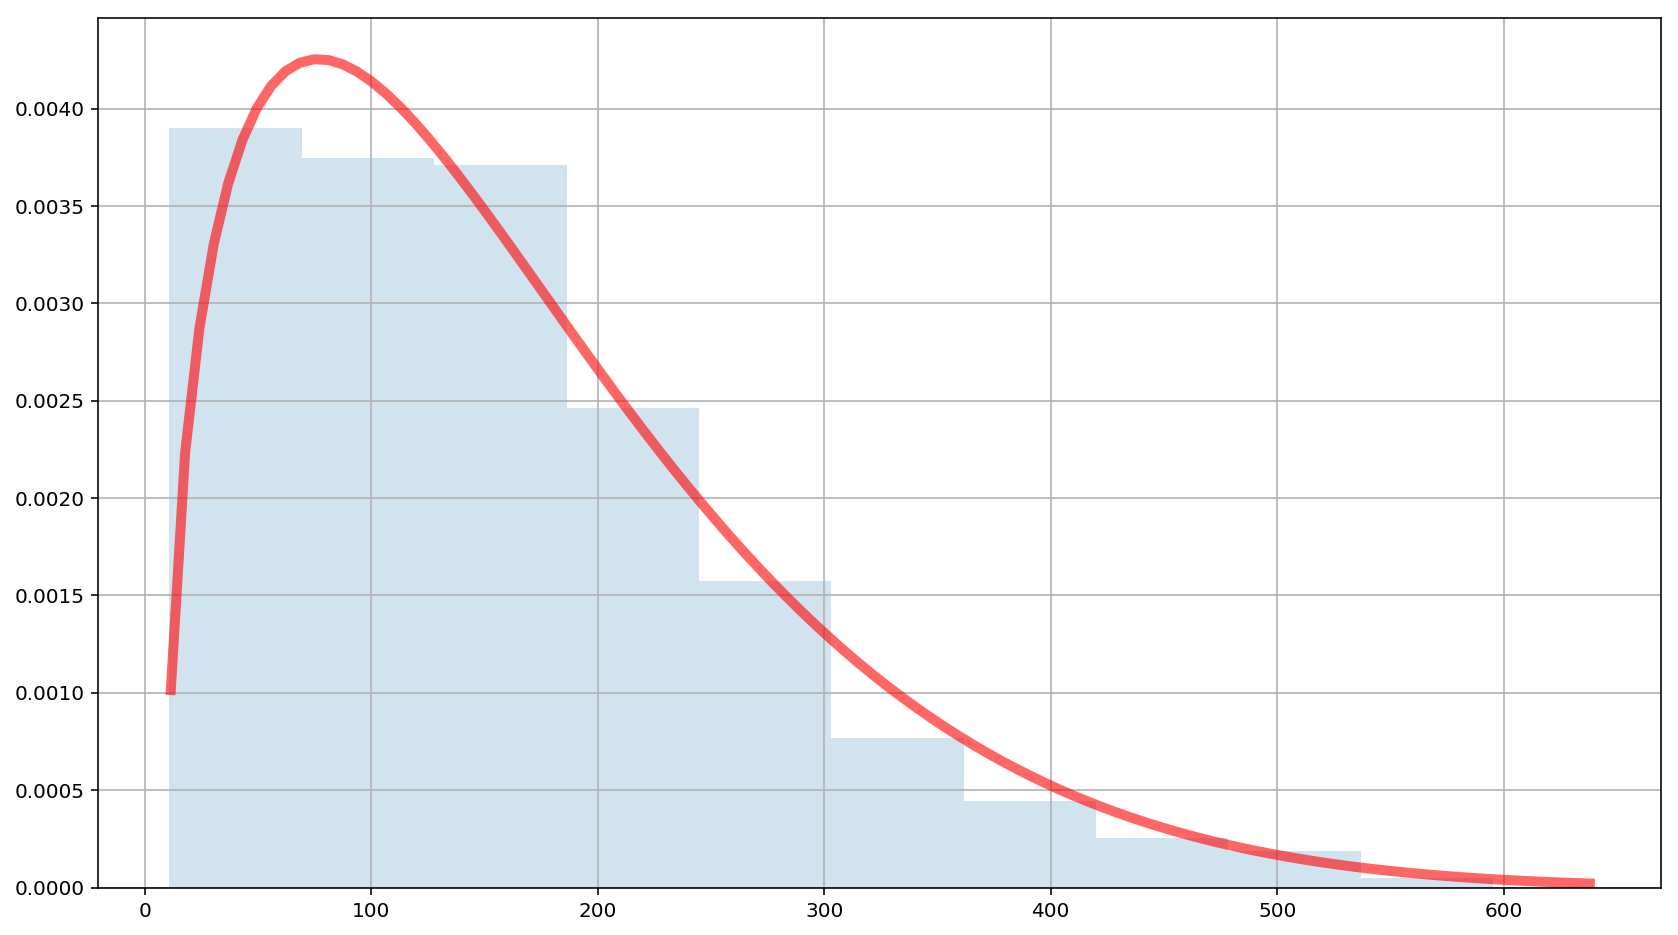

[103, 199, 258, 172, 337, 30, 142, 187, 43, 156, 40, 329, 175, 111, 184, 388, 163, 116, 170, 53]


In [219]:
# Beta Distribution for Capacity
func = stats.beta
a, b = 1.5, 8
loc, scale = 10, 1000

r = func.rvs(a, b, loc=loc, scale=scale, size=1000)

fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = func.stats(a, b, moments='mvsk')
x = np.linspace(func.ppf(0.001, a, b, loc=loc, scale=scale), func.ppf(0.999, a, b, loc=loc, scale=scale), 100)
#x = np.linspace(0, 1000, 500)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, func.pdf(x, a, b, loc=loc, scale=scale), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.grid(True, which='both')
plt.show()
print(list(map(int, func.rvs(a, b, loc=loc, scale=scale, size=20))))

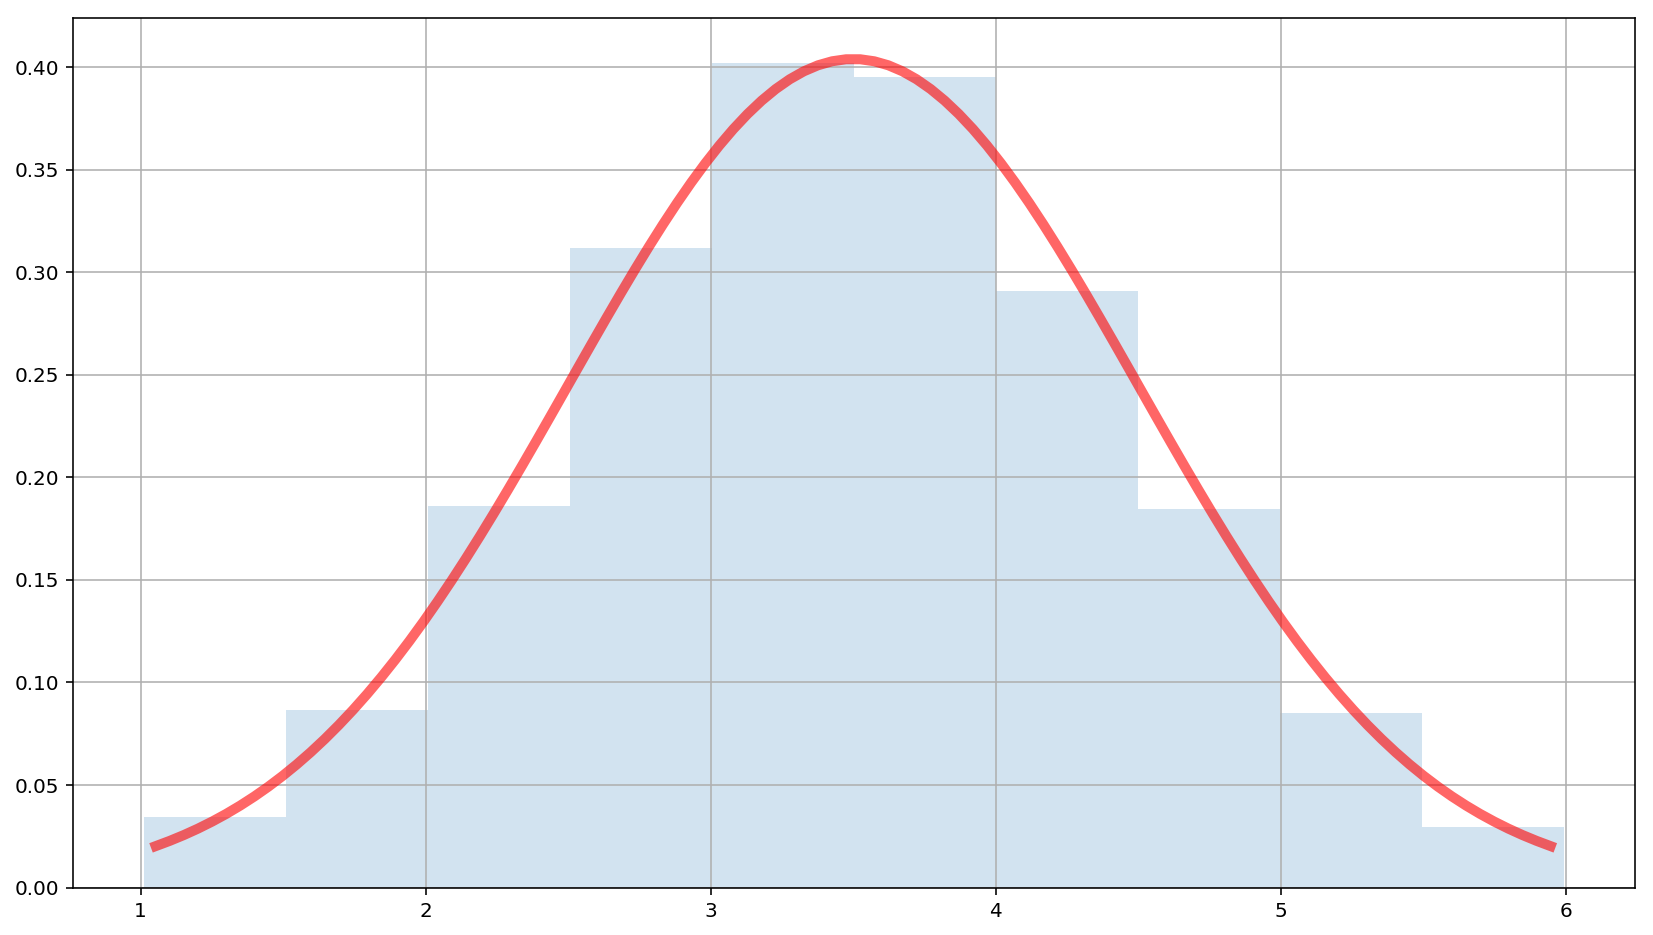

[4, 5, 5, 3, 3, 3, 3, 4, 4, 4, 2, 3, 5, 4, 3, 4, 1, 4, 3, 1]


In [215]:
# Normal Distribution for Expense
func = stats.truncnorm
my_mean, my_std = 3.5, 1
a, b = (1 - my_mean) / my_std, (6 - my_mean) / my_std

loc, scale = my_mean, my_std

r = func.rvs(a, b, loc=loc, scale=scale, size=10000)

fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = func.stats(a, b, moments='mvsk')
x = np.linspace(func.ppf(0.001, a, b, loc=loc, scale=scale), func.ppf(0.999, a, b, loc=loc, scale=scale), 100)
#x = np.linspace(0, 10, 500)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, func.pdf(x, a, b, loc=loc, scale=scale), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.grid(True, which='both')
plt.show()
print(list(map(int, func.rvs(a, b, loc=loc, scale=scale, size=20))))

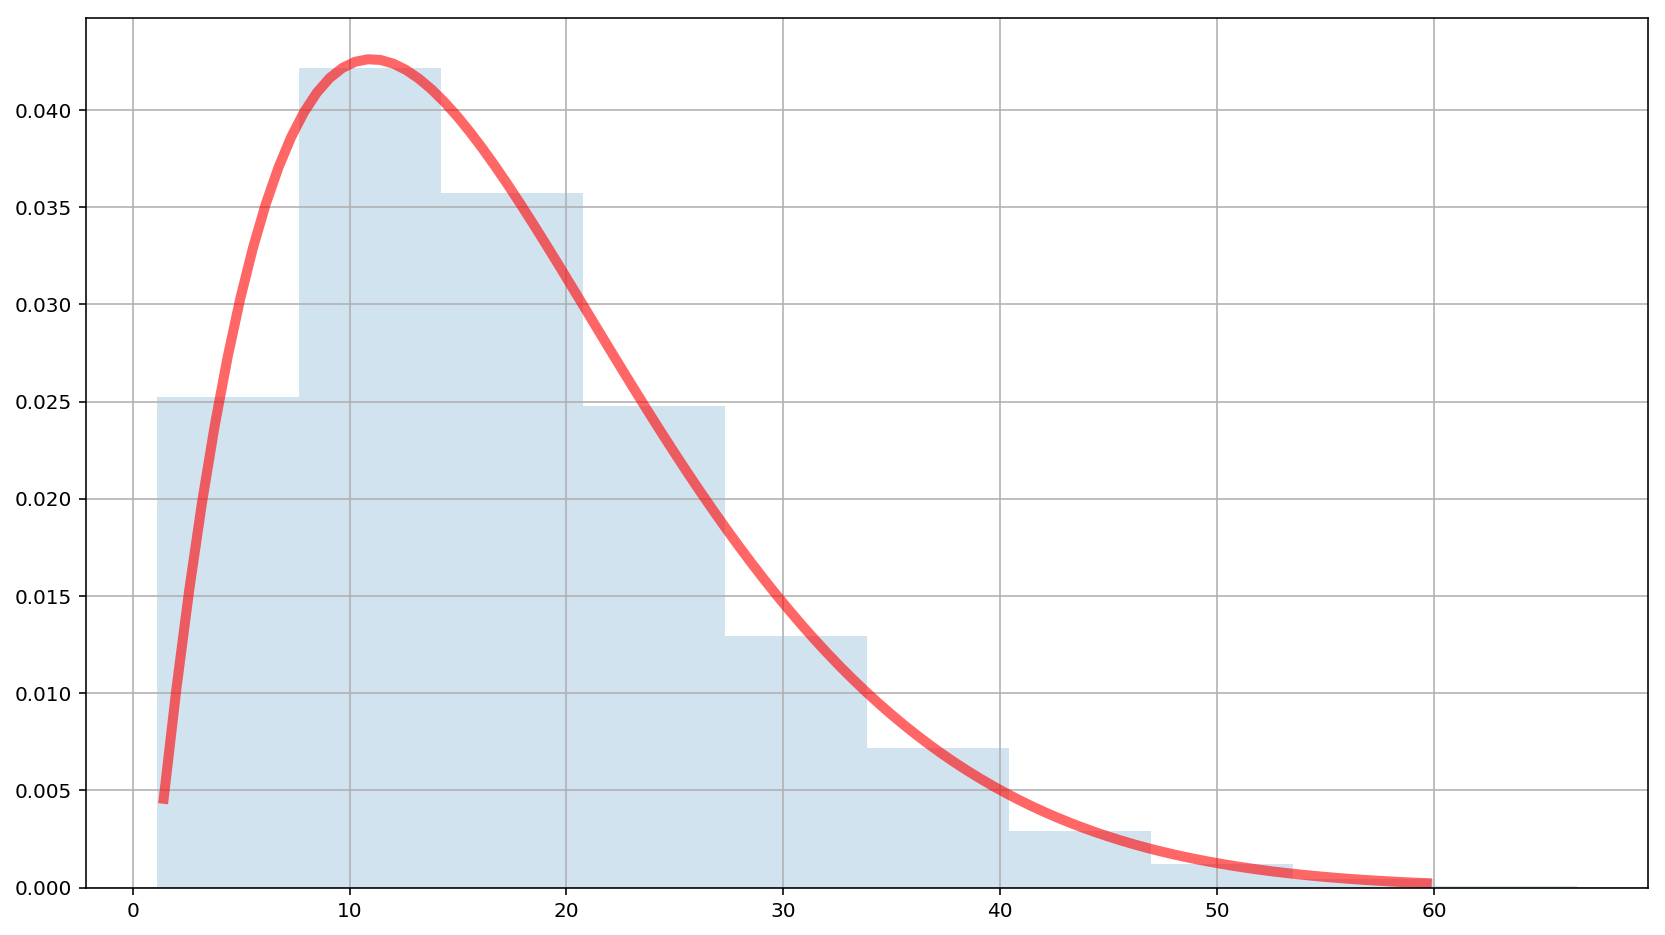

[10, 19, 28, 15, 16, 6, 3, 60, 13, 9, 10, 39, 10, 6, 10, 24, 8, 11, 19, 41]


In [225]:
int(100 * np.random.beta(2, 80, size=None) + 1)

# Beta Distribution for Mean Duration
tuu_in_one_hour = 4
tuu_total = tuu_in_one_hour * 24
tuu_sleep = tuu_in_one_hour * 

func = stats.beta
a, b = 2, 10
loc, scale = 1, 100

r = func.rvs(a, b, loc=loc, scale=scale, size=1000)

fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = func.stats(a, b, moments='mvsk')
x = np.linspace(func.ppf(0.001, a, b, loc=loc, scale=scale), func.ppf(0.999, a, b, loc=loc, scale=scale), 100)
#x = np.linspace(0, 1000, 500)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, func.pdf(x, a, b, loc=loc, scale=scale), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.grid(True, which='both')
plt.show()
print(list(map(int, func.rvs(a, b, loc=loc, scale=scale, size=20))))

392